In [153]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [154]:
def compute_error(points, m, b):
    total_error = 0
    for point in points:
        x = point[0]
        y = point[1]
        total_error += (y - (m*x+b))**2
    return int(total_error)

In [155]:
def print_points_on_graph(points, m, b):
    x_cords = [point[0] for point in points]
    y_cords = [point[1] for point in points]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set(title='Distance biked vs Calories burned', ylabel='Calories burned', xlabel='Distance biked')
    ax.plot(x_cords, y_cords, 'bo')
    
    line_y_cords = [m*i+b for i in range(int(max(x_cords))+20)]
    ax.plot(line_y_cords)

In [156]:
'''
def step_step_gradient(m, b, points, learning_rate):
    b_grad = m_grad = 0
    

def run_gradient_decent(points, m, b, learning_rate, num_iterations):
    for i in range(num_iterations):
        m, b = step_gradient(m, b, points, learning_rate)
        
    return [m, b]
'''

'\ndef step_step_gradient(m, b, points, learning_rate):\n    b_grad = m_grad = 0\n    \n\ndef run_gradient_decent(points, m, b, learning_rate, num_iterations):\n    for i in range(num_iterations):\n        m, b = step_gradient(m, b, points, learning_rate)\n        \n    return [m, b]\n'

starting gradient decent at: y=1x+1 with an error measure = 63881


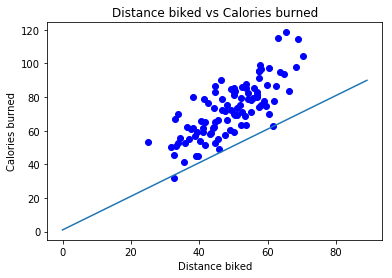

In [157]:
def main():
    points = []
    with open('data.csv', 'r') as file:
        for line in file:
            temp_points = line.strip().split(',')
            points.append(list(map(float, temp_points)))
    
    m = b = 1
    learning_rate = 0.0001
    num_iterations = 1000
    
    # do initial plot
    print_points_on_graph(points, m, b)
    error_measure = compute_error(points, m, b)
    print('starting gradient decent at: y={}x+{} with an error measure = {}'.format(m, b, error_measure))
        

if __name__ == '__main__':
    main()